<a href="https://colab.research.google.com/github/vaibhavchoudhary10/Heart-Disease-Prediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot,plot

import cufflinks as cf

In [5]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/heart.csv')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
df['target']

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [11]:
df.groupby('target').size()

,0
target,
0,138
1,165


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# Visualization

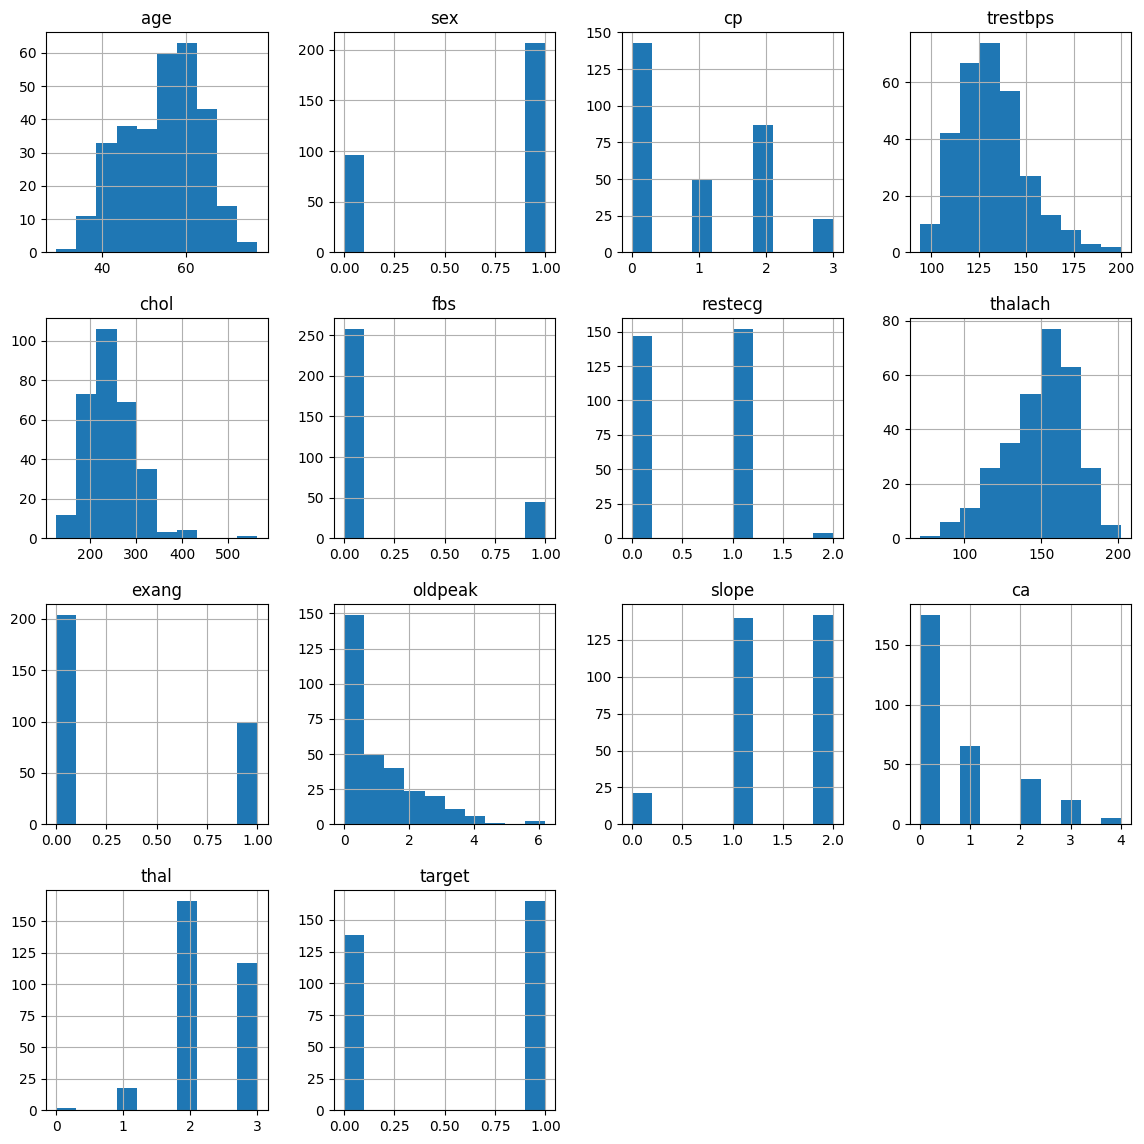

In [15]:
df.hist(figsize=(14,14))
plt.show()

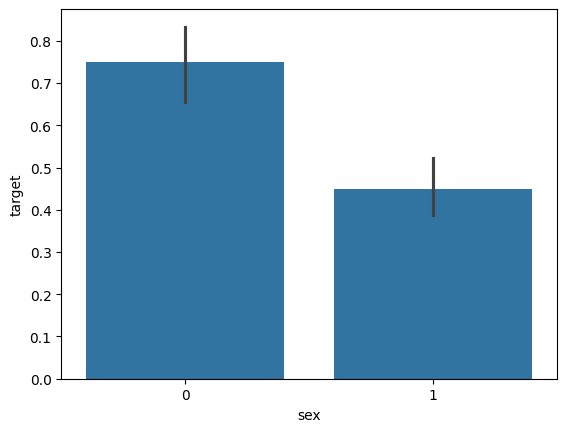

In [16]:
sns.barplot(x=df['sex'], y=df['target'])
plt.show()

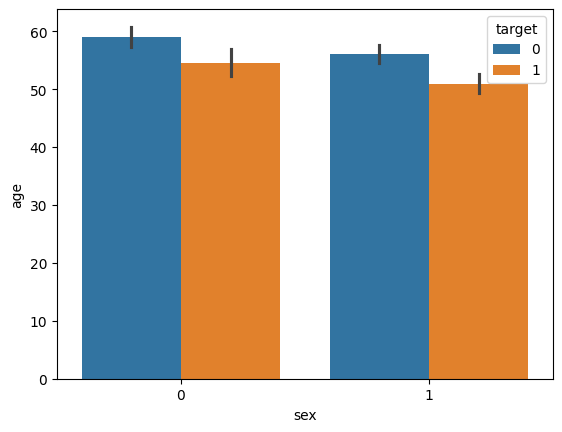

In [17]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])
plt.show()

In [23]:
numeric_columns = ['trestbps','chol','age','oldpeak','thalach']

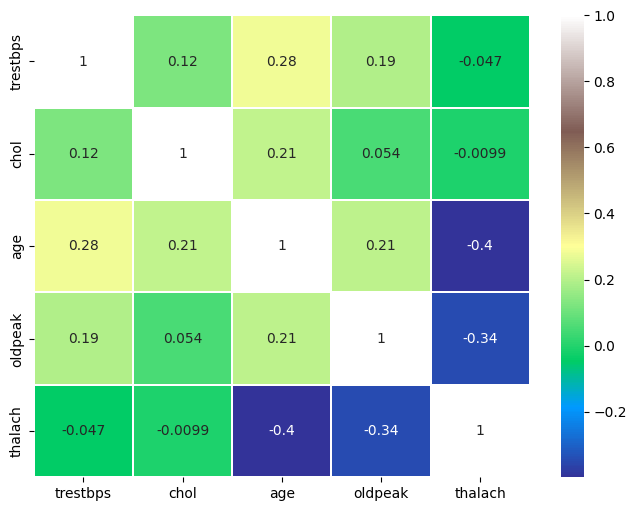

In [27]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<ipython-input-33-b450edf6f588>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-33-b450edf6f588>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-33-b450edf6f588>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

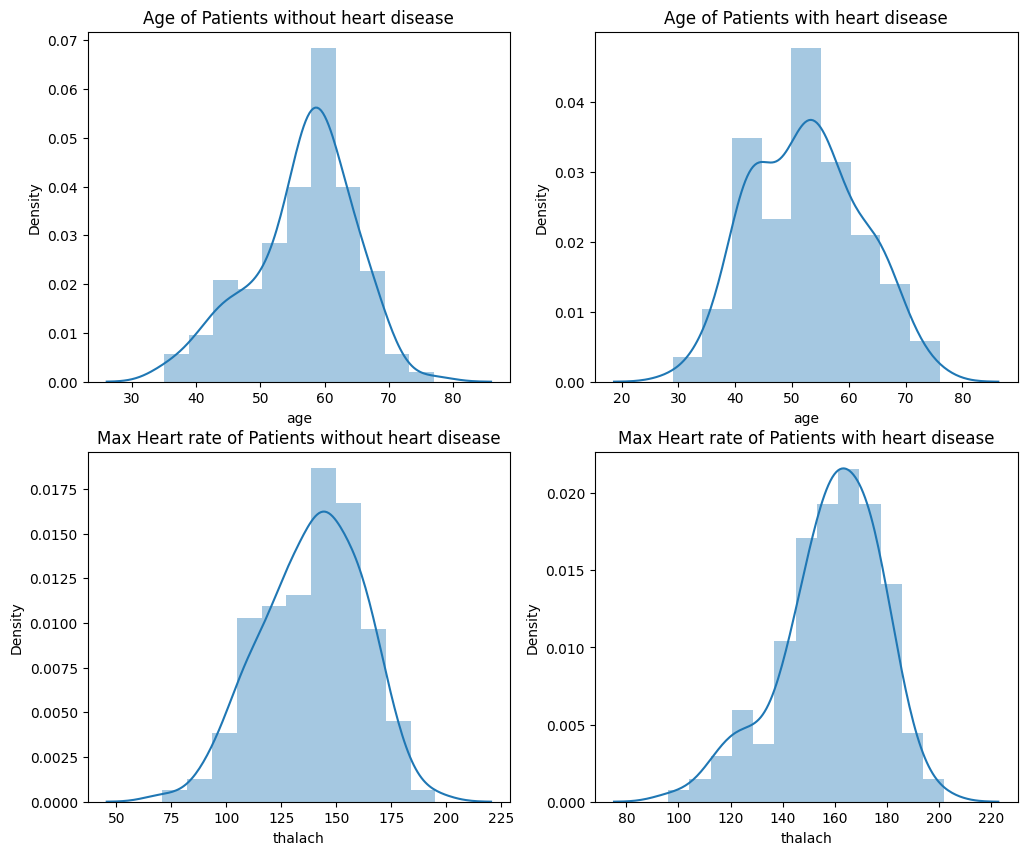

In [33]:
#create four subplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target'] == 0].age)
plt.title('Age of Patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['target'] == 1].age)
plt.title('Age of Patients with heart disease')

plt.subplot(223)
sns.distplot(df[df['target'] == 0].thalach)
plt.title('Max Heart rate of Patients without heart disease')

plt.subplot(224)
sns.distplot(df[df['target'] == 1].thalach)
plt.title('Max Heart rate of Patients with heart disease')
plt.show()

#Data Preprocessing

In [37]:
x,y = df.loc[:,:'thal'],df['target']

In [38]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [165]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(x)
x_std = std.transform(x)


In [166]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [42]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [43]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


#Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [97]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [98]:
prediction = dt.predict(x_test)

In [99]:
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0])

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_dt = accuracy_score(y_test,prediction)

In [102]:
accuracy_dt

0.7692307692307693

In [103]:
dt.feature_importances_

array([0.08622971, 0.03461456, 0.33832546, 0.07538288, 0.0799599 ,
       0.00971408, 0.        , 0.09394537, 0.04724994, 0.04836538,
       0.07645805, 0.10975468, 0.        ])

In [108]:
def plot_feature_importance(model):
  plt.figure(figsize=(8,6))
  n_features = 13
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),x)
  plt.xlabel('Feature Importance')
  plt.ylabel('Features')
  plt.ylim(-1,n_features)


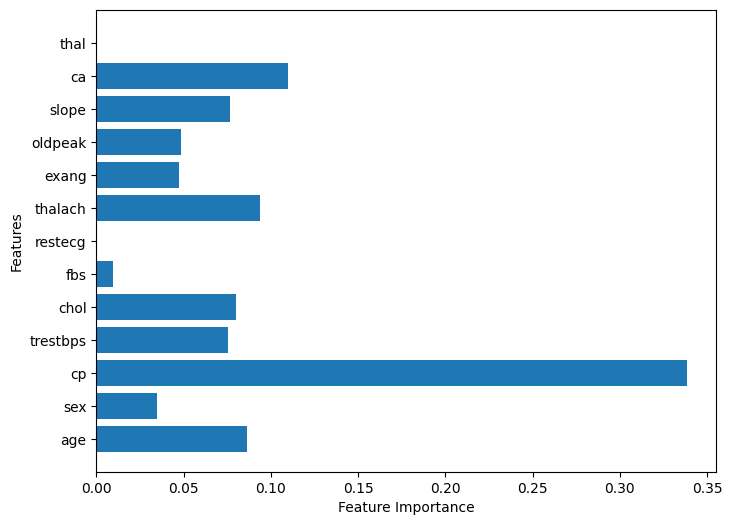

In [109]:
plot_feature_importance(dt)

In [115]:
category = ['No you dont have heart disease', 'Yes you have heart disease']

In [116]:
custom_data = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [117]:
custom_prediction = dt.predict(custom_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [118]:
custom_prediction

array([1])

In [119]:
print(category[int(custom_prediction)])

Yes you have heart disease


<ipython-input-119-a455bc772eea>:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



#KNN Algorithm

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [209]:
knn_prediction = knn.predict(x_test)

In [210]:
knn_accuracy = accuracy_score(y_test,knn_prediction)

In [211]:
knn_accuracy

0.6813186813186813

In [212]:
custom_data = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [213]:
custom_prediction_knn = knn.predict(custom_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [214]:
custom_prediction_knn

array([1])

In [224]:
print(category[int(custom_prediction_knn)])

Yes you have heart disease


<ipython-input-224-b4ea2a7b613e>:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



#Ater Standard Scaler

In [216]:
x_train_std,x_test_std,y_train,y_test = train_test_split(x_std,y,random_state=10,test_size=0.3,shuffle=True)

In [217]:
x_train_std

array([[-0.15069166, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.7021358 ,  0.68100522,  0.03203122, ..., -2.27457861,
        -0.71442887,  1.12302895],
       [ 0.18017482, -1.46841752, -0.93851463, ..., -2.27457861,
         1.24459328,  1.12302895],
       ...,
       [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-2.24617937, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.28306308,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188]])

In [218]:
x_test_std.shape

(91, 13)

In [229]:
knn_std = KNeighborsClassifier(n_neighbors=4)
knn_std.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=4)

In [230]:
knn_prediction_std = knn_std.predict(x_test_std)

In [242]:
accuracy_knn_std = accuracy_score(y_test,knn_prediction_std)

In [243]:
accuracy_knn_std

0.8571428571428571

In [235]:
custom_data_std = std.transform(custom_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [236]:
custom_data_std

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271]])

In [237]:
custom_prediction_knn_std = knn_std.predict(custom_data_std)

In [238]:
custom_prediction_knn_std

array([0])

In [239]:
print(category[int(custom_prediction_knn_std)])

No you dont have heart disease


<ipython-input-239-a60accc4c36d>:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



#best n_neighbors value

In [240]:
k_range = range(1,26)
scores= {}

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_std,y_train)
  prediction_knn = knn.predict(x_test_std)
  scores[k] = accuracy_score(y_test,prediction_knn)

In [241]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

#Compare

In [244]:
Algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_dt,accuracy_knn_std]

<Axes: >

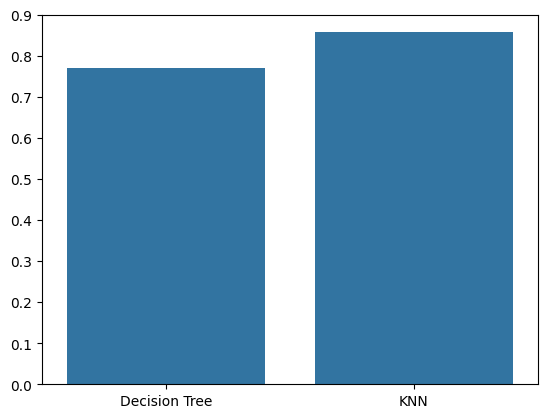

In [246]:
sns.barplot(x=Algorithms,y=scores)